# Initial Analysis
---

Specifically, “Physical activity was assessed on at least three days (one weekend day, and two weekdays).  Total activity counts (AC) per day over the course of time with which the monitor was worn were calculated. Then, to derive average total AC per day, this number was divided by the total
number of valid days worn. Ultimately, total average daily steps, as well as the time that was spent in sedentary, light, moderate, and strenuous activity was provided.”


### References
* Markers of branched-chain amino acid catabolism are not affected by exercise training in pregnant women with obesity
Brittany R. Allman, Beverly J. Spray, Kelly E. Mercer, Aline Andres, and Elisabet Børsheim
Journal of Applied Physiology 2021 130:3, 651-659; [https://doi.org/10.1152/japplphysiol.00673.2020](https://doi.org/10.1152/japplphysiol.00673.2020)
*Diaz, EC, Cleves, MA, DiCarlo, M, et al. Parental adiposity differentially associates with newborn body composition. Pediatric Obesity. 2020; 15:e12596. [https://doi.org/10.1111/ijpo.12596](https://doi.org/10.1111/ijpo.12596)


### Acronym
* **PA**: physical activity
* **AC**: activity count

### Previous Analysis

We assessed PA on at least 3 days (5 days max) including one weekend day and 2 weekdays. We exclude incomplete day, i.e. the first day and the last day. We created a data set containing:
* **Average AC per day**
* **Total average daily steps**
* **Average Time spent in sedentary, light, moderate and vigorous activity** 


## Objective

* **Create a function to visualize summerized activity data across covariates:**
    * *BMI category*
    * *active-status*
    * *multipara*
    * *age*

## Load input: packages, external functions, input data.

### Packages

In [2]:
############
# PACKAGES #
###########

using DataFrames, Dates, CSV, Missings, CategoricalArrays
using PyPlot, StatsBase, Statistics, FreqTables
PyPlot.svg(true)
ioff() # Interactive plotting OFF, necessary for inline plotting in IJulia

### External Functions

In [3]:
######################
# External Functions #
######################

# Include the modules directory
dirFun = realpath("../src/")
include(dirFun*"/ActTools.jl");
include(dirFun*"/ActStatData.jl"); # include(dirFun*"/ActPlotData.jl"))
include(dirFun*"/GetBio.jl");
include(dirFun*"/ActDisplay.jl");


### Data

In [4]:
# List of visit directories
listDir = ["../data/data_processed/"]

# Visit Dictionary 
dictVisitName =  Dict(1=>"VisitBaseline",
                    2=>"Visit32w",
                    3=>"Visit6wPP",
                    4=>"Visit6mPP",
                    5=>"Visit12mPP");

# Load the group assignment information
groupFileName = realpath(string(@__DIR__, "../data/Group/group_assignement.csv"))
global dfGroup = DataFrame!(CSV.File(groupFileName));
sort!(dfGroup);

# output directory
outDir = "../data/data_processed/";


Extract data for one visit:

In [5]:
visit = 1
# Get the path of the directory 
myDir = abspath(string(@__DIR__,listDir[visit]))

"C:\\git\\smartphysicalactivity\\data\\data_processed\\"

Read demographic infromation:

In [6]:
# Load the group assignment information
demogFileName = realpath(string(@__DIR__, "../data/Group/Accel_Demog_Extract.csv"))
dfDemog = DataFrame!(CSV.File(demogFileName));
rename!(dfDemog, Dict(:StudyID => "studyID"));

In [7]:
names(dfDemog)

12-element Array{String,1}:
 "studyID"
 "Arm"
 "BMI"
 "BMICategory"
 "Race"
 "Ethnicity"
 "PreviousLiveBirth"
 "age"
 "active_status"
 "weight_scr"
 "weight_b"
 "weight_pregest"

Read activity summary data for the VBaseile and 32 weeks visits:

In [8]:
# Baseline
fileName = joinpath(myDir,string("AvgSummary_",dictVisitName[1],".csv"))
dfAvgBaseline = dropmissing(DataFrame!(CSV.File(fileName))); # remove missing ID

# 32 weeks
fileName = joinpath(myDir,string("AvgSummary_",dictVisitName[2],".csv"))
dfAvg32weeks = dropmissing(DataFrame!(CSV.File(fileName))); # remove missing ID

In [9]:
# Join Demographic information 
dfAvgBaseline = leftjoin(dfAvgBaseline, dfDemog, on = :studyID);
dfAvg32weeks = leftjoin(dfAvg32weeks, dfDemog, on = :studyID);

In [10]:
names(dfAvgBaseline);

Find study ID where BMI is missing:

In [11]:
dfAvgBaseline.studyID[findall(x -> x === missing, dfAvgBaseline.BMICategory)]

1-element Array{Int64,1}:
 491

In [12]:
dfAvg32weeks.studyID[findall(x -> x === missing, dfAvg32weeks.BMICategory)]

Int64[]

In [13]:
unique(dfAvg32weeks.BMICategory)

3-element Array{Union{Missing, String},1}:
 "Normal"
 "Obese"
 "Overweight"

Drop missing:

In [14]:
dfAvgBaseline = dropmissing(dfAvgBaseline); # remove missing ID

##  BMI Category

### Baseline

Check all unique categories of BMI:

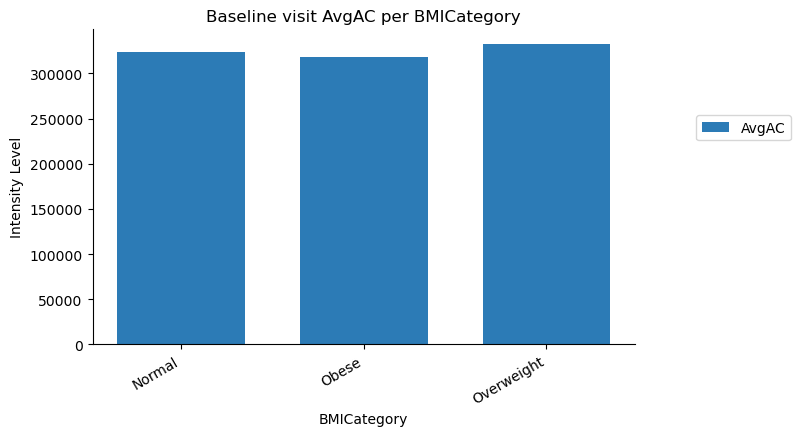

In [48]:
df1 = getCatActSummary(deepcopy(dfAvgBaseline), :BMICategory, [:AvgAC])
# df1 = getCatActSummary(deepcopy(dfAvgBaseline), :BMICategory, 
#                  [:AvgSedentary, :AvgLight, :AvgModerate, :AvgVigorous],
#                  compPerc= true)
# display(df1)
plotCatActLvlSummary(df1, "Baseline visit ")

### 32 weeks

,BMICategory,nrow,AvgSedentary,AvgLight,AvgModerate,AvgVigorous
,String?,Int64,Float64,Float64,Float64,Float64
1,Normal,65,49.59,43.12,7.27,0.02
2,Obese,46,49.29,43.4,7.3,0.01
3,Overweight,72,50.45,41.36,8.16,0.03


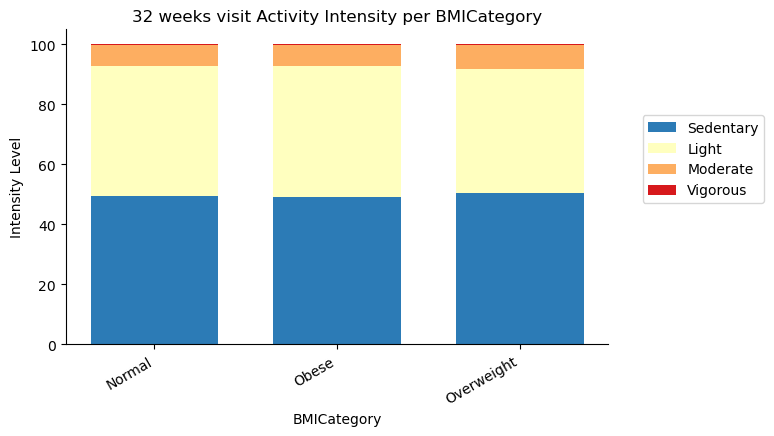

In [39]:
# df2 = getCatActSummary(deepcopy(dfAvg32weeks), :BMICategory, [:AvgAC])
df2 = getCatActSummary(deepcopy(dfAvg32weeks), :BMICategory, 
                 [:AvgSedentary, :AvgLight, :AvgModerate, :AvgVigorous],
                 compPerc= true, ismedian = false)
display(df2)
plotCatActLvlSummary(df2, "32 weeks visit ")

## Active Status

### Baseline

,active_status,nrow,AvgSedentary,AvgLight,AvgModerate,AvgVigorous
,String,Int64,Float64,Float64,Float64,Float64
1,Active Duty,132,50.48,41.9,7.57,0.05
2,Dependent w,126,51.71,40.52,7.74,0.03
3,Retired,6,46.18,43.24,10.56,0.02


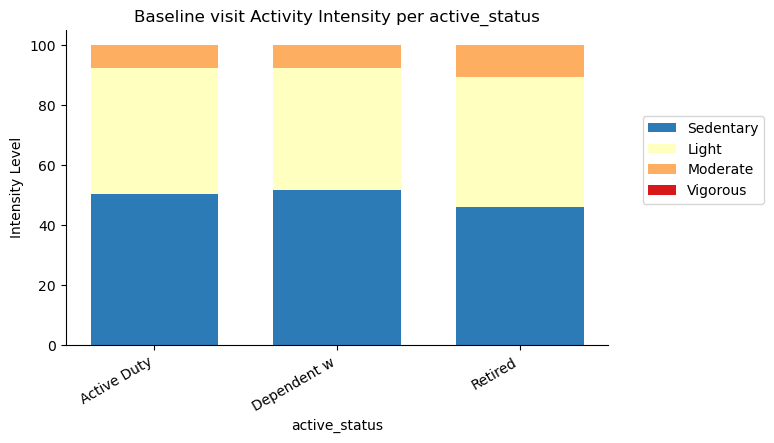

In [17]:
# df1 = getCatActSummary(deepcopy(dfAvgBaseline), :active_status, [:AvgSteps])
df1 = getCatActSummary(deepcopy(dfAvgBaseline), :active_status, 
                 [:AvgSedentary, :AvgLight, :AvgModerate, :AvgVigorous],
                 compPerc= true)
display(df1)
plotCatActLvlSummary(df1, "Baseline visit ")

### 32 weeks

,active_status,nrow,AvgSedentary,AvgLight,AvgModerate,AvgVigorous
,String?,Int64,Float64,Float64,Float64,Float64
1,Active Duty,88,49.82,43.14,7.03,0.01
2,Dependent w,90,50.4,41.69,7.89,0.02
3,Retired,5,40.63,45.96,13.36,0.05


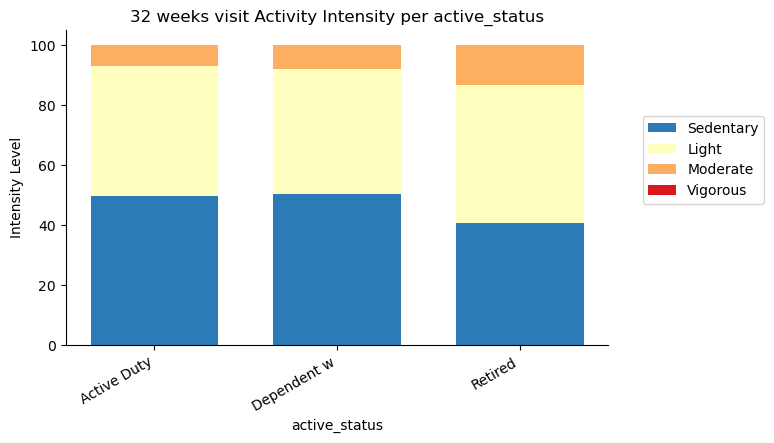

In [18]:
# df2 = getCatActSummary(deepcopy(dfAvg32weeks), :active_status, [:AvgSteps])
df2 = getCatActSummary(deepcopy(dfAvg32weeks), :active_status, 
                 [:AvgSedentary, :AvgLight, :AvgModerate, :AvgVigorous],
                 compPerc= true)
display(df2)
plotCatActLvlSummary(df2, "32 weeks visit ")

## Multipara

### Baseline

,PreviousLiveBirth,nrow,AvgSedentary,AvgLight,AvgModerate,AvgVigorous
,String,Int64,Float64,Float64,Float64,Float64
1,No,119,51.8,40.77,7.38,0.05
2,Yes,145,50.28,41.69,8.0,0.03


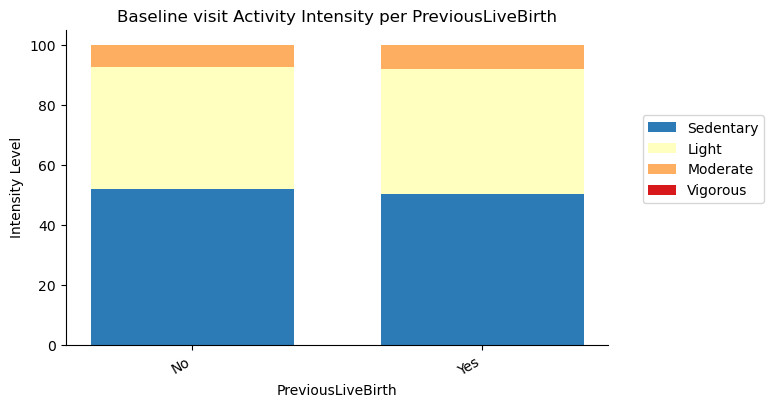

In [19]:
# df1 = getCatActSummary(deepcopy(dfAvgBaseline), :PreviousLiveBirth, [:AvgSteps])
df1 = getCatActSummary(deepcopy(dfAvgBaseline), :PreviousLiveBirth, 
                 [:AvgSedentary, :AvgLight, :AvgModerate, :AvgVigorous],
                 compPerc= true)
display(df1)
plotCatActLvlSummary(df1, "Baseline visit ")

### 32 weeks

,PreviousLiveBirth,nrow,AvgSedentary,AvgLight,AvgModerate,AvgVigorous
,String?,Int64,Float64,Float64,Float64,Float64
1,No,81,51.3,41.25,7.43,0.02
2,Yes,102,48.71,43.49,7.78,0.02


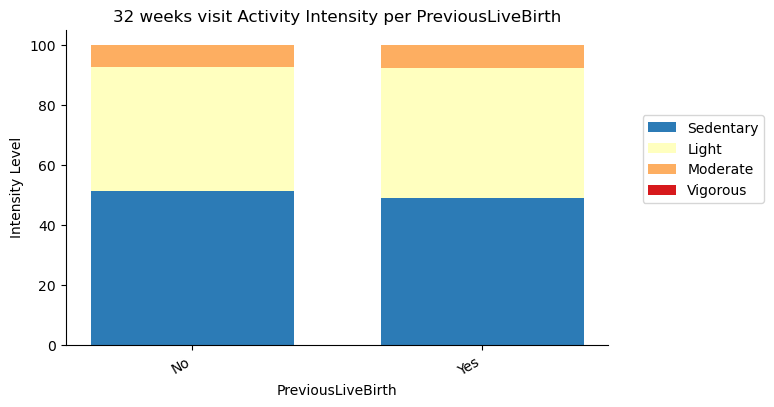

In [20]:
# df2 = getCatActSummary(deepcopy(dfAvg32weeks), :PreviousLiveBirth, [:AvgSteps])
df2 = getCatActSummary(deepcopy(dfAvg32weeks), :PreviousLiveBirth, 
                 [:AvgSedentary, :AvgLight, :AvgModerate, :AvgVigorous],
                 compPerc= true)
display(df2)
plotCatActLvlSummary(df2, "32 weeks visit ")

## Race

### Baseline

,Race,nrow,AvgSedentary,AvgLight,AvgModerate,AvgVigorous
,String,Int64,Float64,Float64,Float64,Float64
1,American Indian/ Alaska N,2,51.65,37.35,10.95,0.05
2,Asian,8,51.42,39.09,9.36,0.13
3,Black or African American,42,50.84,41.47,7.66,0.03
4,Mixed race,11,48.71,41.97,9.25,0.07
5,Native Hawaiian or Other,2,48.39,45.62,5.99,0.0
6,Other,18,51.96,41.41,6.62,0.01
7,White,181,51.04,41.26,7.66,0.04


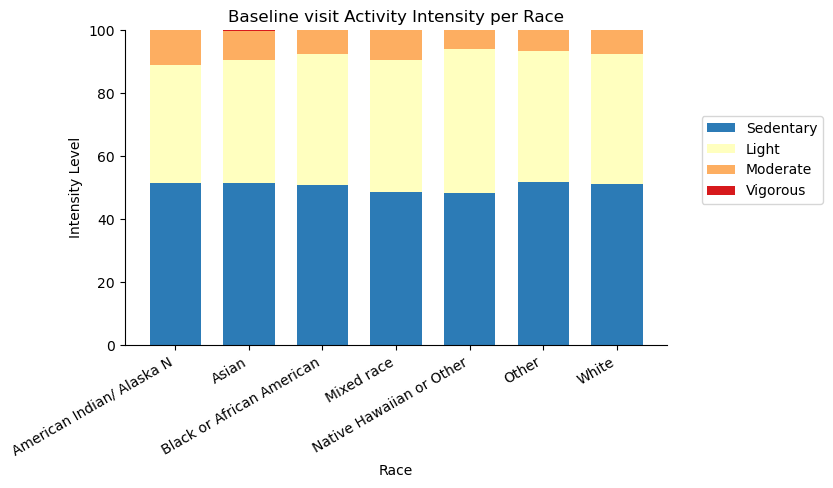

In [21]:
# df1 = getCatActSummary(deepcopy(dfAvgBaseline), :Race, [:AvgSteps])
df1 = getCatActSummary(deepcopy(dfAvgBaseline), :Race,
                 [:AvgSedentary, :AvgLight, :AvgModerate, :AvgVigorous],
                 compPerc= true)
display(df1)
plotCatActLvlSummary(df1, "Baseline visit ")

### 32 weeks

,Race,nrow,AvgSedentary,AvgLight,AvgModerate,AvgVigorous
,String?,Int64,Float64,Float64,Float64,Float64
1,Asian,8,54.77,39.05,6.18,0.0
2,Black or African American,27,52.97,41.27,5.75,0.01
3,Mixed race,8,48.99,43.79,7.21,0.01
4,Native Hawaiian or Other,1,35.57,56.58,7.85,0.0
5,Other,11,46.49,47.04,6.45,0.02
6,White,128,49.34,42.4,8.24,0.02


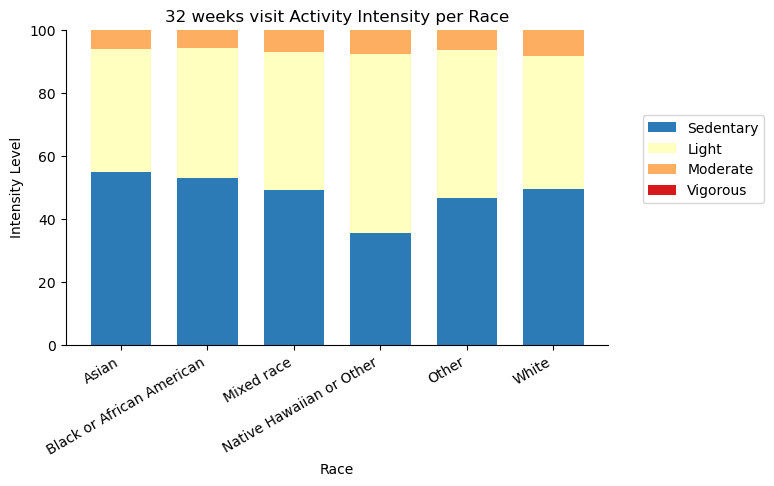

In [22]:
# df2 = getCatActSummary(deepcopy(dfAvg32weeks), :Race, [:AvgSteps])
df2 = getCatActSummary(deepcopy(dfAvg32weeks), :Race, 
                 [:AvgSedentary, :AvgLight, :AvgModerate, :AvgVigorous],
                 compPerc= true)
display(df2)
plotCatActLvlSummary(df2, "32 weeks visit ")

## Group

### Baseline

,Arm,nrow,AvgSedentary,AvgLight,AvgModerate,AvgVigorous
,String,Int64,Float64,Float64,Float64,Float64
1,GWG,90,49.75,42.24,7.98,0.03
2,GWG+PPWL,92,50.76,41.06,8.11,0.07
3,PPWL,82,52.54,40.45,7.0,0.01


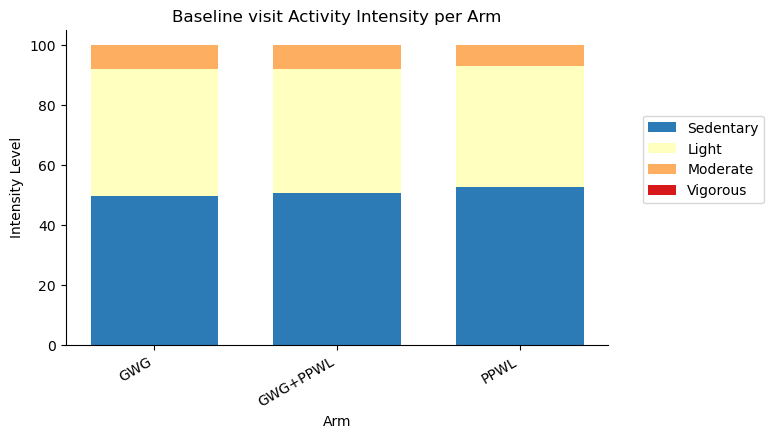

In [23]:
# df1 = getCatActSummary(deepcopy(dfAvgBaseline), :Arm, [:AvgSteps])
df1 = getCatActSummary(deepcopy(dfAvgBaseline), :Arm,
                 [:AvgSedentary, :AvgLight, :AvgModerate, :AvgVigorous],
                 compPerc= true)
display(df1)
plotCatActLvlSummary(df1, "Baseline visit ")

### 32 weeks

,Arm,nrow,AvgSedentary,AvgLight,AvgModerate,AvgVigorous
,String?,Int64,Float64,Float64,Float64,Float64
1,GWG,60,49.74,43.39,6.85,0.02
2,GWG+PPWL,61,49.55,42.55,7.87,0.03
3,PPWL,62,50.26,41.59,8.13,0.02


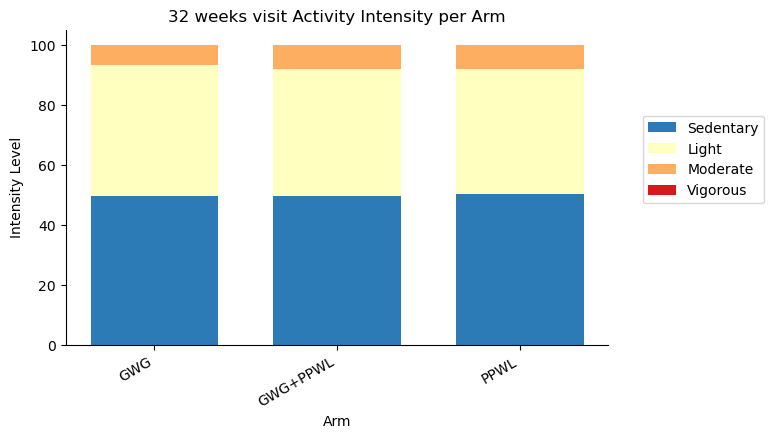

In [24]:
# df2 = getCatActSummary(deepcopy(dfAvg32weeks), :Arm, [:AvgSteps])
df2 = getCatActSummary(deepcopy(dfAvg32weeks), :Arm, 
                 [:AvgSedentary, :AvgLight, :AvgModerate, :AvgVigorous],
                 compPerc= true)
display(df2)
plotCatActLvlSummary(df2, "32 weeks visit ")

## Age

### Baseline

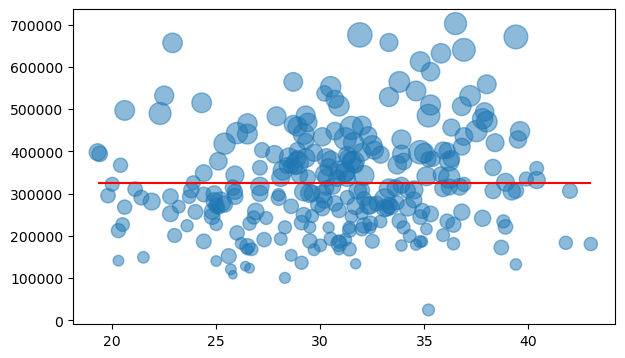

In [25]:
figA = figure("pyplot_barplot",figsize=(7,5))
scatter(dfAvgBaseline.age, dfAvgBaseline.AvgAC,s=dfAvgBaseline.AvgSteps./100 ,  alpha=0.5)
hlines(mean(dfAvgBaseline.AvgAC), minimum(dfAvgBaseline.age), maximum(dfAvgBaseline.age), colors="red", linestyles="solid")
figA.autofmt_xdate(bottom=0.25,rotation=0,ha="center")


### 32 weeks

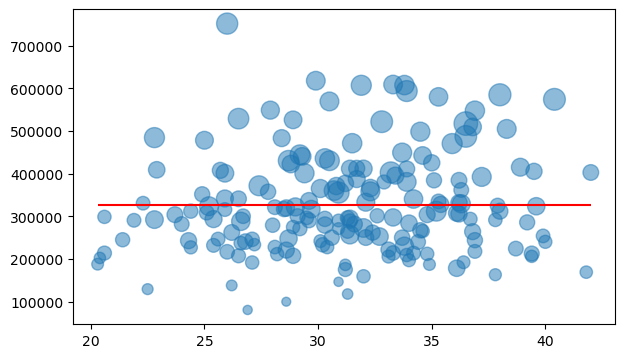

In [26]:
figA = figure("pyplot_barplot",figsize=(7,5))
scatter(dfAvg32weeks.age, dfAvg32weeks.AvgAC,s=dfAvg32weeks.AvgSteps./100 ,  alpha=0.5)
hlines(mean(dfAvg32weeks.AvgAC), minimum(dfAvg32weeks.age), maximum(dfAvg32weeks.age), colors="red", linestyles="solid")
figA.autofmt_xdate(bottom=0.25,rotation=0,ha="center")


## Intersection Data

### Age

In [15]:
df1, df2 = getIntersect(deepcopy(dfAvgBaseline), deepcopy(dfAvg32weeks));

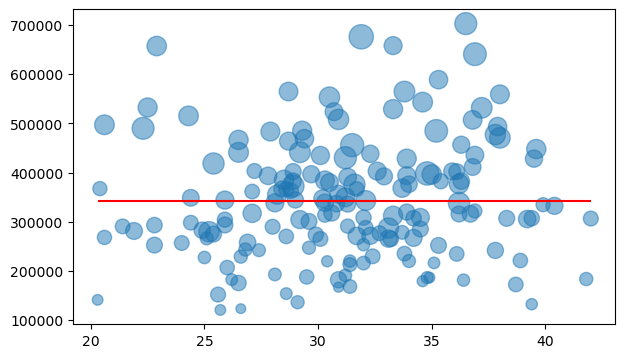

In [16]:
figA = figure("pyplot_barplot",figsize=(7,5))
scatter(df1.age, df1.AvgAC,s=df1.AvgSteps./100 ,  alpha=0.5)
hlines(mean(df1.AvgAC), minimum(df1.age), maximum(df1.age), colors="red", linestyles="solid")
figA.autofmt_xdate(bottom=0.25,rotation=0,ha="center")


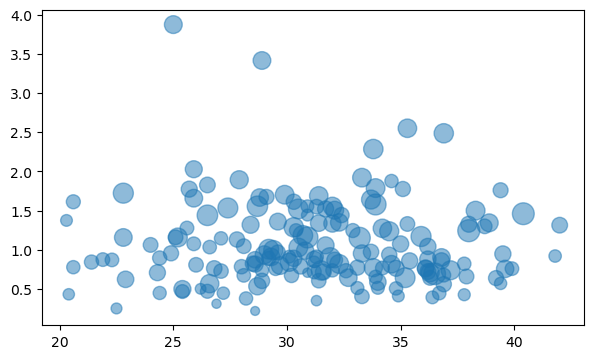

In [17]:
figA = figure("pyplot_barplot",figsize=(7,5))
scatter(df2.age, df2.AvgAC./df1.AvgAC,s=df2.AvgSteps./100 ,  alpha=0.5)
# hlines(mean(df2.AvgAC), minimum(df2.age), maximum(df2.age), colors="red", linestyles="solid")
figA.autofmt_xdate(bottom=0.25,rotation=0,ha="center")


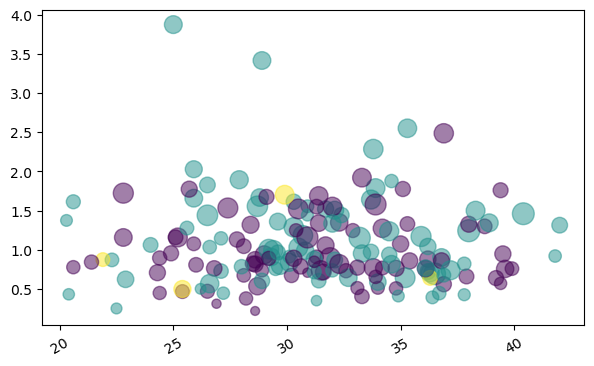

In [23]:
figA = figure("pyplot_barplot",figsize=(7,5))
scatter(df2.age, df2.AvgAC./df1.AvgAC,s=df2.AvgSteps./100 , c = vZ1, alpha=0.5)
# hlines(mean(df2.AvgAC./df1.AvgAC), minimum(df2.age), maximum(df2.age), colors="red", linestyles="solid")
figA.autofmt_xdate(bottom=0.25,rotation=30,ha="center")


### BMI

In [22]:
vName = unique(df1.active_status)
vZ1 = zeros(Int64, size(df1)[1]);
for i in 1:size(df1)[1]
   vZ1[i] = findall(x -> x == df1.active_status[i], vName)[1]     
end

vZ2 = zeros(Int64, size(df2)[1]);
for i in 1:size(df1)[1]
   vZ2[i] = findall(x -> x == df2.active_status[i], vName)[1]     
end

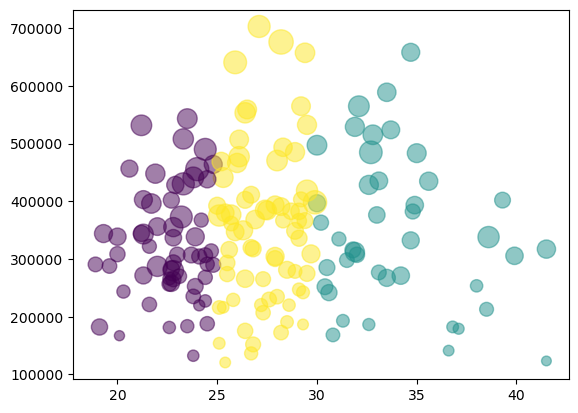

PyObject <matplotlib.collections.PathCollection object at 0x0000000043499130>

In [31]:
scatter(df1.BMI, df1.AvgAC,s=df1.AvgSteps./100 ,c = vZ1,   alpha=0.5)


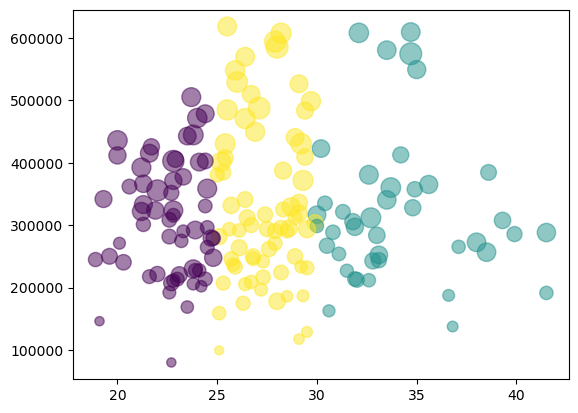

PyObject <matplotlib.collections.PathCollection object at 0x00000000440A78E0>

In [32]:
scatter(df2.BMI, df2.AvgAC,s=df2.AvgSteps./100 ,c = vZ2,   alpha=0.5)


Check who changed BMI category.

In [33]:
hcat(vZ1, vZ2)
idx = findall(sort(df1.studyID) .!= sort(df2.studyID))

Int64[]

In [34]:
df2.studyID[46]

695